# 作業 : (Kaggle)鐵達尼生存預測

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 練習特徵重要性的寫作與觀察

# [作業重點]
- 仿造範例, 完成特徵重要性的計算, 並觀察對預測結果的影響 (In[3]~[5], Out[3]~[5]) 
- 仿造範例, 將兩個特徵重要性最高的特徵重組出新特徵, 並觀察對預測結果的影響 (In[8], Out[8]) 

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

data_path = 'C:\\Users\\linkevinya\\ML-100Days\\Part02\\'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId', 'Survived'] , axis=1)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
(df['Name'].values)

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [7]:
list(df['Name'].values)

[108,
 190,
 353,
 272,
 15,
 554,
 515,
 624,
 412,
 576,
 727,
 95,
 729,
 28,
 840,
 359,
 682,
 867,
 839,
 512,
 273,
 80,
 523,
 765,
 626,
 44,
 240,
 260,
 605,
 813,
 828,
 776,
 289,
 856,
 535,
 372,
 505,
 134,
 837,
 589,
 7,
 827,
 446,
 456,
 212,
 697,
 473,
 604,
 726,
 38,
 629,
 594,
 333,
 246,
 620,
 873,
 707,
 595,
 853,
 299,
 749,
 385,
 337,
 755,
 784,
 560,
 596,
 185,
 25,
 440,
 396,
 300,
 376,
 161,
 87,
 546,
 778,
 563,
 127,
 223,
 842,
 737,
 519,
 141,
 386,
 52,
 255,
 764,
 259,
 149,
 159,
 31,
 150,
 209,
 184,
 740,
 292,
 308,
 219,
 422,
 656,
 658,
 858,
 405,
 312,
 542,
 724,
 559,
 675,
 552,
 667,
 882,
 67,
 417,
 46,
 645,
 178,
 826,
 70,
 24,
 362,
 551,
 575,
 848,
 857,
 588,
 525,
 499,
 653,
 234,
 225,
 165,
 695,
 851,
 772,
 685,
 585,
 271,
 618,
 282,
 99,
 597,
 319,
 116,
 32,
 586,
 29,
 254,
 580,
 121,
 68,
 643,
 532,
 889,
 612,
 866,
 287,
 181,
 767,
 716,
 186,
 847,
 82,
 129,
 628,
 293,
 157,
 760,
 69,
 486,
 8

In [9]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [17]:
estimator = RandomForestClassifier()
estimator.fit(df.values, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = RandomForestClassifier()
estimator.fit(df.values, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

Sex         0.259986
Ticket      0.154007
Name        0.129241
Fare        0.120667
Age         0.108333
Pclass      0.065982
Cabin       0.060078
SibSp       0.042196
Parch       0.032493
Embarked    0.027016
dtype: float64

## 先用隨機森林對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?

In [13]:
high_feature=feats[:5].index

In [14]:
df[high_feature]

,Sex,Ticket,Name,Fare,Age
0,1.0,0.769118,0.121348,0.014151,0.283951
1,0.0,0.876471,0.213483,0.139136,0.481481
2,0.0,0.983824,0.396629,0.015469,0.333333
3,0.0,0.072059,0.305618,0.103644,0.444444
4,1.0,0.694118,0.016854,0.015713,0.444444
5,1.0,0.404412,0.622472,0.016510,0.000000
6,1.0,0.125000,0.578652,0.101229,0.679012
7,1.0,0.580882,0.701124,0.041136,0.037037
8,0.0,0.505882,0.462921,0.021731,0.345679
9,0.0,0.194118,0.647191,0.058694,0.185185


In [15]:
# 高重要性特徵 + 隨機森林
"""
Your Code Here
"""
high_feature=list(feats[:5].index)
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7991189405440908

In [18]:
# 原始特徵 + 隨機森林
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8283325655448444

# 作業2
* 將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?

In [25]:
feats[:5].index

Index(['Sex', 'Ticket', 'Name', 'Fare', 'Age'], dtype='object')

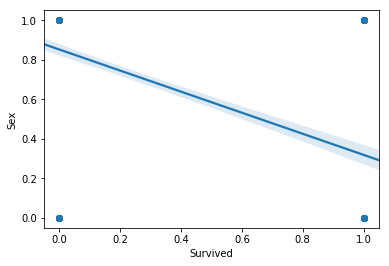

In [20]:
# 觀察重要特徵與目標的分布
# 第一名              
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=train_Y, y=df['Sex'], fit_reg=True)


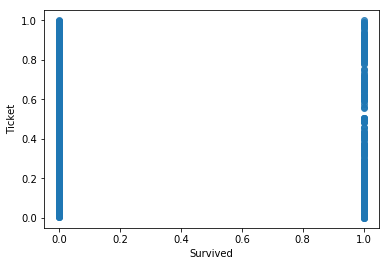

In [21]:
# 第二名       
sns.regplot(x=train_Y, y=df['Ticket'], fit_reg=False)
plt.show()

In [ ]:
# 製作新特徵看效果
"""
Your Code Here
"""
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

In [22]:
df['add_fea']=(df['Sex']+df['Ticket'])/2
df['multi_fea']=df['Sex']*df['Ticket']
df['divid_fea']=(df['Sex']/(df['Ticket']+1))*2
df['divid2_fea']=(df['Ticket']/(df['Sex']+1))*2
train_X=MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8159856400501173